In [1]:
import gzip
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt


In [8]:
run = "fourth_run"
with gzip.open(f"results/{run}/_0/info.pkl.gz") as file:
    losses = pickle.load(file)
with gzip.open(f"results/{run}/_0/train_info.pkl.gz") as file:
    obj = pickle.load(file)

In [6]:
total, term, state, _, _ = list(zip(*losses["train_losses"]))

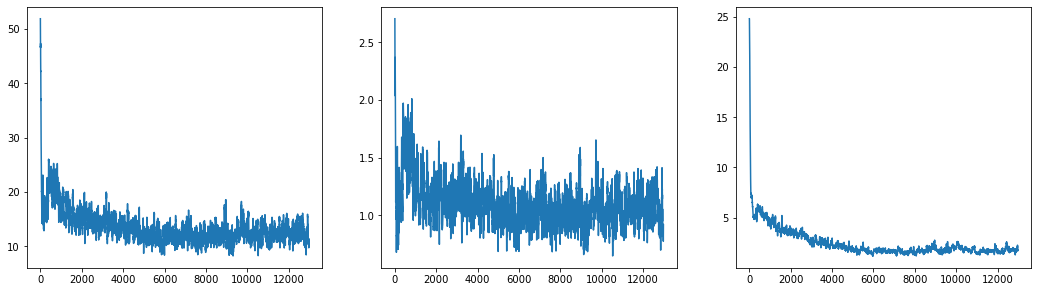

In [7]:
fig, axes = plt.subplots(1, 3, figsize = np.array([6*3, 4.8]))
mv_avg = 20
axes[0].plot(np.convolve(total, np.ones(mv_avg), "valid")/mv_avg)
axes[1].plot(np.convolve(term, np.ones(mv_avg), "valid")/mv_avg)
axes[2].plot(np.convolve(state, np.ones(mv_avg), "valid")/mv_avg)

In [16]:
len(losses)

6

In [5]:
len(obj)

161

(array([0.18188859, 0.25984084, 0.27283289, 0.30531299, 0.27932891,
        0.20787268, 0.0909443 , 0.04547215, 0.01299204, 0.01948806]),
 array([2.11843266e-03, 5.98786596e-01, 1.19545476e+00, 1.79212292e+00,
        2.38879109e+00, 2.98545925e+00, 3.58212741e+00, 4.17879558e+00,
        4.77546374e+00, 5.37213190e+00, 5.96880007e+00]),
 [<matplotlib.patches.Polygon at 0x7f33fa45db38>])

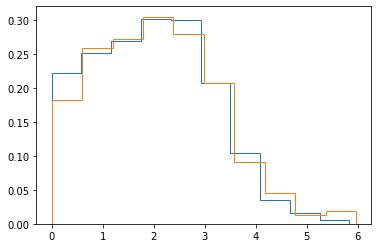

In [13]:
rewards = np.concatenate([ele[4][ele[4].nonzero()] for ele in obj])
proportion = 0.9
plt.hist(rewards[:int(len(rewards)*proportion)], histtype="step", density = True)
plt.hist(rewards[int(len(rewards)*proportion):], histtype="step", density = True)

In [2]:
with open("data/blocks_PDB_105.json") as file:
    dic = eval(file.read())

In [3]:
block_smi = (list(dic["block_smi"].values()))
block_rs = (list(dic["block_r"].values()))
true_block_set = sorted(set(block_smi))

nr1 = np.int32([0] + list(np.cumsum([
            max(block_rs[block_smi.index(i)])+1 for i in true_block_set])))

In [70]:
block_smi = np.array(list(dic["block_smi"].values()))
block_rs = np.array(list(dic["block_r"].values()))

nr2 = np.cumsum([0] + [max(sum(block_rs[block_smi == smi_set], []))+1 for smi_set in true_block_set])
nr3 = np.cumsum([0] + [max(map(len, block_rs[block_smi == smi_set])) for smi_set in true_block_set])

In [10]:
from rdkit import Chem
from rdkit.Chem import Draw

In [7]:
mols = [Chem.MolFromSmiles(smi) for smi in block_smi]

In [18]:
mols[0]

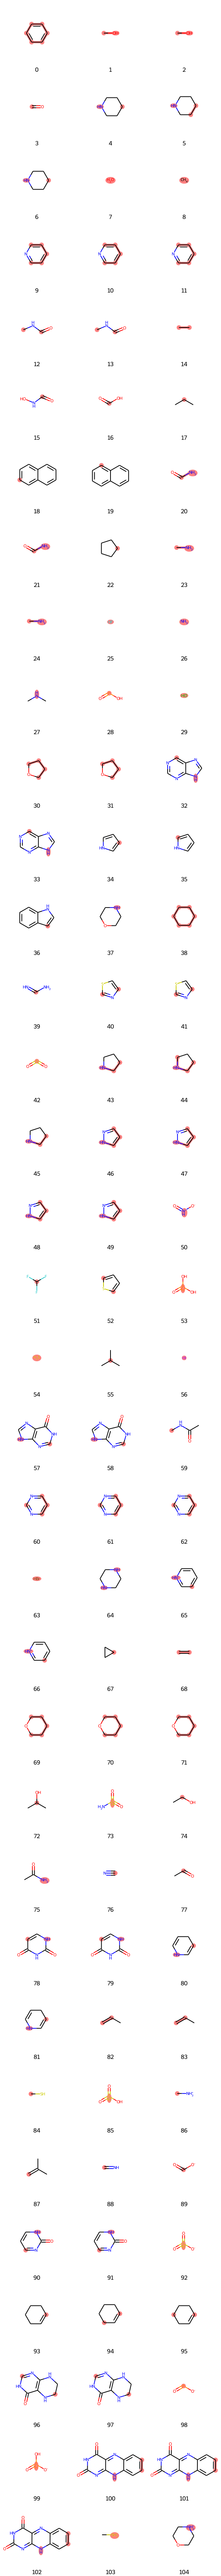

In [40]:
Draw.MolsToGridImage(mols, highlightAtomLists = block_rs, legends = list(map(str, range(len(mols)))))

In [42]:
block_smi[9:12]

['c1ccncc1', 'c1ccncc1', 'c1ccncc1']

In [41]:
block_rs[9:12]

[[0, 1, 2, 4, 5], [1, 0, 2, 4, 5], [2, 0, 1, 4, 5]]

In [73]:
[block_rs[block_smi == smi_set] for smi_set in true_block_set]

[array([list([0])], dtype=object),
 array([list([0])], dtype=object),
 array([list([0])], dtype=object),
 array([list([0]), list([2, 0]), list([3, 0])], dtype=object),
 array([list([0, 2]), list([2, 0])], dtype=object),
 array([list([0])], dtype=object),
 array([list([0])], dtype=object),
 array([list([0, 1, 2, 3, 4, 5])], dtype=object),
 array([list([0, 3, 4]), list([2, 0, 3, 4]), list([3, 0, 4])], dtype=object),
 array([list([0, 3]), list([1, 0, 3]), list([3, 0])], dtype=object),
 array([list([0, 4, 1, 2, 4]), list([2, 4, 0, 1, 4])], dtype=object),
 array([list([0, 1, 2, 4, 5]), list([1, 0, 2, 4, 5]),
        list([2, 0, 1, 4, 5])], dtype=object),
 array([list([2, 5])], dtype=object),
 array([list([5])], dtype=object),
 array([list([5])], dtype=object),
 array([list([0, 1])], dtype=object),
 array([list([0])], dtype=object),
 array([list([0, 1]), list([1, 0])], dtype=object),
 array([list([0])], dtype=object),
 array([list([0])], dtype=object),
 array([list([0, 1])], dtype=object),
 

In [33]:
np.int32([0] + list(np.cumsum([
            max(block_rs[block_smi.index(i)])+1 for i in true_block_set])))

array([  0,   1,   2,   3,   4,   7,   8,   9,  15,  20,  24,  29,  35,
        41,  47,  53,  55,  56,  58,  59,  60,  62,  64,  66,  69,  71,
        73,  75,  77,  79,  80,  83,  85,  86,  87,  89,  90,  91,  93,
        94,  95,  97,  99, 101, 102, 104, 106, 108, 110, 112, 114, 116,
       118, 120, 122, 124, 131, 140, 145, 154, 161, 162, 166, 167, 174,
       175, 181, 187, 192, 197, 203, 207, 214], dtype=int32)

[array([2.87118697, 1.38289773, 2.00685883, 0.88342279, 0.03450078,
        1.80699635, 1.84311545, 0.00780683, 2.78805351, 2.07986808,
        2.09984708, 2.92325449, 2.3927145 , 1.40870214, 1.22651041,
        1.83464468]),
 array([1.68847454, 3.4077177 , 1.14693284, 2.37001181, 3.04588103,
        1.37676489, 4.04953718, 2.78214836, 1.59388435, 0.17694166,
        2.52903056, 1.44898832, 1.86723351, 2.62913895, 3.11696982,
        3.80015206]),
 array([2.81572652, 1.7559967 , 2.71123695, 3.43916965, 1.08041286,
        2.08774304, 0.79282397, 3.75784206, 3.16672492, 2.95835829,
        1.32062614, 1.74251866, 1.87757254, 1.04703653, 2.39912677,
        2.41322517]),
 array([2.57442713, 3.8392961 , 3.00541186, 2.04269266, 1.93526125,
        1.91978073, 2.25145817, 1.20875025, 2.47064018, 3.08802485,
        2.70586801, 1.69402385, 0.97685426, 2.05551767, 0.88023067,
        0.74947143]),
 array([3.35965037, 1.53360105, 2.58015156, 1.30337226, 1.47385275,
        2.76221418, 0.218685